In [2]:
import numpy as np
from statistics import mean

results_cranelift_rust = []
results_singlepass_rust = []
results_wasmtime_rust = []
results_cranelift_c = []
results_singlepass_c = []
results_wasmtime_c = []

for i in range(30):
    result_cranelift_rust = !./jsonnet_wasmer_cranelift test_ffi.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'
    result_singlepass_rust = !./jsonnet_wasmer_singlepass test_ffi.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'
    result_wasmtime_rust = !./jsonnet_wasmtime test_ffi.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'
    result_cranelift_c = !./jsonnet_wasmer_cranelift test_ffi_c.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'
    result_singlepass_c = !./jsonnet_wasmer_singlepass test_ffi_c.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'
    result_wasmtime_c = !./jsonnet_wasmtime test_ffi_c.jsonnet | grep initialisation | grep -o '[0-9]\+\.[0-9]\+'

    results_cranelift_rust.append(float(result_cranelift_rust[0]))
    results_singlepass_rust.append(float(result_singlepass_rust[0]))
    results_wasmtime_rust.append(float(result_wasmtime_rust[0]))
    results_cranelift_c.append(float(result_cranelift_c[0]))
    results_singlepass_c.append(float(result_singlepass_c[0]))
    results_wasmtime_c.append(float(result_wasmtime_c[0]))

result_cranelift_rust = mean(results_cranelift_rust)
result_singlepass_rust = mean(results_singlepass_rust)
result_wasmtime_rust = mean(results_wasmtime_rust)
result_cranelift_c = mean(results_cranelift_c)
result_singlepass_c = mean(results_singlepass_c)
result_wasmtime_c = mean(results_wasmtime_c)

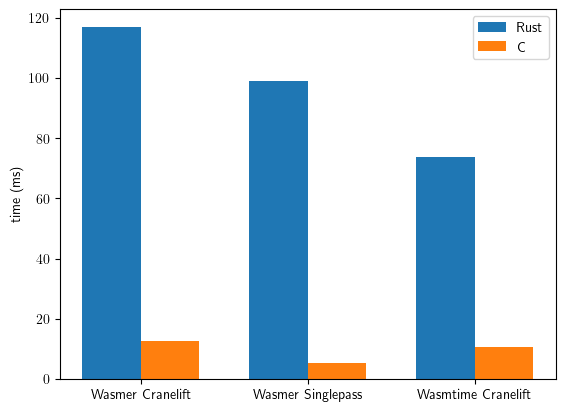

<Figure size 640x480 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
})

labels = ["Wasmer Cranelift", "Wasmer Singlepass", "Wasmtime Cranelift"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width / 2, [result_cranelift_rust, result_singlepass_rust, result_wasmtime_rust], width, label="Rust")
ax.bar(x + width / 2, [result_cranelift_c, result_singlepass_c, result_wasmtime_c], width, label="C")
ax.set_ylabel(r"time (ms)")
ax.set_xticks(x, labels)
ax.legend()

plt.savefig("wasm_compilers.pdf")
plt.show()